In [3]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
import numpy as np
import pandas as pd 

In [5]:
df = pd.read_excel("ESCAPE-NA1.xlsx")
df.head()

,ena1_id,test_dice_score,train_dice_score,moca,region,country,sex,race,ethnic,site_enrolment,...,hx_cnstraum,hx_majsurg,hx_pvd,hx_crf,hx_highchol,hx_afib,hx_anticoag,hx_htn,hx_diab.1,hx_smok.1
0,01-001,NaN,0.876799,NaN,Canadaa,Canada,male,White,0.0,88,...,0.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0,No,Past
1,01-002,NaN,NaN,NaN,Canadaa,Canada,female,White,0.0,88,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,No,Never
2,01-003,NaN,NaN,24.0,Canadaa,Canada,female,Asian,0.0,88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,Never
3,01-004,NaN,0.000000,16.0,Canadaa,Canada,male,White,0.0,88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,Never
4,01-005,NaN,NaN,16.0,Canadaa,Canada,male,White,0.0,88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,No,Never


In [6]:
imparied = (df["moca"] < 23).sum()

not_imparied = (df["moca"] >= 23).sum()


print ("MoCA < 23 where they are imparied :", imparied)
print ("Moca >= 23 where they are not imparied:", not_imparied)

MoCA < 23 where they are imparied : 282
Moca >= 23 where they are not imparied: 477


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ena1_id           1105 non-null   object 
 1   test_dice_score   61 non-null     float64
 2   train_dice_score  168 non-null    float64
 3   moca              759 non-null    float64
 4   region            1105 non-null   object 
 5   country           1105 non-null   object 
 6   sex               1105 non-null   object 
 7   race              1105 non-null   object 
 8   ethnic            1104 non-null   float64
 9   site_enrolment    1105 non-null   int64  
 10  rx_weight         1105 non-null   float64
 11  age_calc          1105 non-null   float64
 12  hx_diab           1104 non-null   object 
 13  hx_smok           1099 non-null   object 
 14  hgb_BL            1062 non-null   float64
 15  plt_BL            1057 non-null   float64
 16  hct_BL            1069 non-null   float64


In [8]:
# Drop the coloumns that we do not want 


df = df.drop("test_dice_score", axis = 1) 
df = df.drop("train_dice_score", axis = 1) 
df = df.drop("ecrcl_BL", axis = 1) 
df = df.drop("ena1_id", axis = 1) 
df = df.drop("hx_smok.1", axis = 1) 
df = df.drop("hx_diab.1", axis = 1) 
df = df.drop("site_enrolment", axis = 1) 
df = df.drop("hx_anticoag", axis = 1) 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   moca         759 non-null    float64
 1   region       1105 non-null   object 
 2   country      1105 non-null   object 
 3   sex          1105 non-null   object 
 4   race         1105 non-null   object 
 5   ethnic       1104 non-null   float64
 6   rx_weight    1105 non-null   float64
 7   age_calc     1105 non-null   float64
 8   hx_diab      1104 non-null   object 
 9   hx_smok      1099 non-null   object 
 10  hgb_BL       1062 non-null   float64
 11  plt_BL       1057 non-null   float64
 12  hct_BL       1069 non-null   float64
 13  ptt_BL       923 non-null    float64
 14  inr_BL       1025 non-null   float64
 15  glc_BL       1062 non-null   float64
 16  na_BL        1062 non-null   float64
 17  k_BL         1055 non-null   float64
 18  cl_BL        979 non-null    float64
 19  hco3_B

In [10]:
#Clean the coloumn names 

df.columns = (df.columns.str.strip().str.lower().str.replace(r'[^a-z0-9]+', '_', regex=True).str.replace(r'_+$', '', regex=True)
)

In [11]:
# Fix the region coloumn cause the naming of Canada is not correct 

if 'region' in df.columns: 
    
    df['region'] = df['region'].replace({'Canadaa' : 'Canada'})

In [12]:
df = df.loc[:, ~df.columns.duplicated()]
df.columns

Index(['moca', 'region', 'country', 'sex', 'race', 'ethnic', 'rx_weight',
       'age_calc', 'hx_diab', 'hx_smok', 'hgb_bl', 'plt_bl', 'hct_bl',
       'ptt_bl', 'inr_bl', 'glc_bl', 'na_bl', 'k_bl', 'cl_bl', 'hco3_bl',
       'creat_bl', 'egfr_bl', 'hx_cadihd', 'hx_chf', 'hx_recestrk',
       'hx_paststrk', 'hx_ich', 'hx_cnstraum', 'hx_majsurg', 'hx_pvd',
       'hx_crf', 'hx_highchol', 'hx_afib', 'hx_htn'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   moca         759 non-null    float64
 1   region       1105 non-null   object 
 2   country      1105 non-null   object 
 3   sex          1105 non-null   object 
 4   race         1105 non-null   object 
 5   ethnic       1104 non-null   float64
 6   rx_weight    1105 non-null   float64
 7   age_calc     1105 non-null   float64
 8   hx_diab      1104 non-null   object 
 9   hx_smok      1099 non-null   object 
 10  hgb_bl       1062 non-null   float64
 11  plt_bl       1057 non-null   float64
 12  hct_bl       1069 non-null   float64
 13  ptt_bl       923 non-null    float64
 14  inr_bl       1025 non-null   float64
 15  glc_bl       1062 non-null   float64
 16  na_bl        1062 non-null   float64
 17  k_bl         1055 non-null   float64
 18  cl_bl        979 non-null    float64
 19  hco3_b

In [14]:
df.head()

,moca,region,country,sex,race,ethnic,rx_weight,age_calc,hx_diab,hx_smok,...,hx_recestrk,hx_paststrk,hx_ich,hx_cnstraum,hx_majsurg,hx_pvd,hx_crf,hx_highchol,hx_afib,hx_htn
0,NaN,Canada,Canada,male,White,0.0,77.0,70.000000,No,Past,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,NaN,Canada,Canada,female,White,0.0,59.0,46.700001,No,Never,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24.0,Canada,Canada,female,Asian,0.0,55.0,63.599998,No,Never,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16.0,Canada,Canada,male,White,0.0,84.0,76.199997,No,Never,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,Canada,Canada,male,White,0.0,80.0,87.199997,No,Never,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [15]:
# Convert the MoCA scores to Numeric and drop the rows without a MoCA score

df["moca"] = pd.to_numeric(df["moca"], errors="coerce")

df = df.dropna(subset=["moca"])

# Create the binary target where 1 = cogntive decline and 0 = no decline 
df["target"] = (df["moca"] < 23).astype(int)



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 2 to 1104
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   moca         759 non-null    float64
 1   region       759 non-null    object 
 2   country      759 non-null    object 
 3   sex          759 non-null    object 
 4   race         759 non-null    object 
 5   ethnic       759 non-null    float64
 6   rx_weight    759 non-null    float64
 7   age_calc     759 non-null    float64
 8   hx_diab      759 non-null    object 
 9   hx_smok      758 non-null    object 
 10  hgb_bl       731 non-null    float64
 11  plt_bl       728 non-null    float64
 12  hct_bl       738 non-null    float64
 13  ptt_bl       641 non-null    float64
 14  inr_bl       708 non-null    float64
 15  glc_bl       735 non-null    float64
 16  na_bl        734 non-null    float64
 17  k_bl         728 non-null    float64
 18  cl_bl        680 non-null    float64
 19  hco3_bl     

In [17]:
df.columns.tolist()

['moca',
 'region',
 'country',
 'sex',
 'race',
 'ethnic',
 'rx_weight',
 'age_calc',
 'hx_diab',
 'hx_smok',
 'hgb_bl',
 'plt_bl',
 'hct_bl',
 'ptt_bl',
 'inr_bl',
 'glc_bl',
 'na_bl',
 'k_bl',
 'cl_bl',
 'hco3_bl',
 'creat_bl',
 'egfr_bl',
 'hx_cadihd',
 'hx_chf',
 'hx_recestrk',
 'hx_paststrk',
 'hx_ich',
 'hx_cnstraum',
 'hx_majsurg',
 'hx_pvd',
 'hx_crf',
 'hx_highchol',
 'hx_afib',
 'hx_htn',
 'target']

In [18]:
feature_columns = [
    "region",
    "country",
    "sex",
    "race",
    "ethnic",
    "rx_weight",
    "age_calc",
    "hx_diab",
    "hx_smok",
    "hgb_bl",
    "plt_bl",
    "hct_bl",
    "ptt_bl",
    "inr_bl",
    "glc_bl",
    "na_bl",
    "k_bl",
    "cl_bl",
    "hco3_bl",
    "creat_bl",
    "egfr_bl",
    "hx_cadihd",
    "hx_chf",
    "hx_recestrk",
    "hx_paststrk",
    "hx_ich",
    "hx_cnstraum",
    "hx_majsurg",
    "hx_pvd",
    "hx_crf",
    "hx_highchol",
    "hx_afib",
    "hx_htn",

]

X = df[feature_columns]

Y = df["target"]

In [19]:
numeric_columns = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_columns = [c for c in feature_columns if c not in numeric_columns]

print("Numeric features:", numeric_columns)
print("Categorical features", categorical_columns)

Numeric features: ['ethnic', 'rx_weight', 'age_calc', 'hgb_bl', 'plt_bl', 'hct_bl', 'ptt_bl', 'inr_bl', 'glc_bl', 'na_bl', 'k_bl', 'cl_bl', 'hco3_bl', 'creat_bl', 'egfr_bl', 'hx_cadihd', 'hx_chf', 'hx_recestrk', 'hx_paststrk', 'hx_ich', 'hx_cnstraum', 'hx_majsurg', 'hx_pvd', 'hx_crf', 'hx_highchol', 'hx_afib', 'hx_htn']
Categorical features ['region', 'country', 'sex', 'race', 'hx_diab', 'hx_smok']


In [20]:
# Splitting the data into train and test 

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size = 0.2,
    random_state = 42,
    stratify = Y
)

In [21]:

# Numeric columns, replaces the missing values with the median 
transformer_numeric = Pipeline(steps = [("imputer", SimpleImputer(strategy = "median")),("scaler", StandardScaler())]
)

# Categorical columns, replaces the missing values with the most common value
transformer_categorical = Pipeline(steps = [("imputer", SimpleImputer(strategy ="most_frequent")), ("onehot", OneHotEncoder( drop="first", handle_unknown = "ignore"))]
)


preprocess = ColumnTransformer(
    transformers = [
        ("num", transformer_numeric, numeric_columns),
        ("cat", transformer_categorical, categorical_columns)
    ]
)

In [22]:
temp_pipeline = Pipeline([("prep", preprocess)])

temp_pipeline.fit(X_train, Y_train)

categorical_pipline = temp_pipeline.named_steps["prep"].named_transformers_["cat"]
onehot = categorical_pipline.named_steps["onehot"]

features_ohe = list(onehot.get_feature_names_out(categorical_columns))

features_all = numeric_columns + features_ohe


print("Cohort Characteristics")

print(f"Total patients: {len(df)}")
print(f"Training set: {len(X_train)}")
print(f"Test set: {len(X_test)}")

print(f"Cognitive impairment rate: {Y.mean():.1%}")
print(f"Total features after encoding done: {len(features_all)}")


Cohort Characteristics
Total patients: 759
Training set: 607
Test set: 152
Cognitive impairment rate: 37.2%
Total features after encoding done: 47


In [23]:
# L1 Model 

cs = np.logspace(-3, 2, 15)

l1_model = LogisticRegressionCV(
    Cs = cs, cv = 5, penalty = "l1", solver = "saga",
    scoring = "roc_auc", max_iter = 5000, n_jobs = -1, refit = True
)

l1_pipe = Pipeline([("prep", clone(preprocess)), ("model", l1_model)])
l1_pipe.fit(X_train, Y_train)


l1_predict_y = l1_pipe.predict(X_test)
l1_proba_y = l1_pipe.predict_proba(X_test)[:, 1]

l1_acc = accuracy_score(Y_test, l1_predict_y)
l1_auc = roc_auc_score(Y_test, l1_proba_y)

print ("L1 Model")
print(f"Accuracy: {l1_acc:.3f}")
print(f"ROC AUC: {l1_auc:.3f}")




l1_coefs = l1_pipe.named_steps["model"].coef_.ravel()
epsilon = 1e-6
l1_n_selected = np.sum(np.abs(l1_coefs) > epsilon)

print(f"Number of selected features: {l1_n_selected} / {len(features_all)}")


# Sparse predictors 

l1_coef_df = pd.DataFrame({ "feature": features_all, "coef": l1_coefs, "abs_coef": np.abs(l1_coefs)})



l1_sparse_df = l1_coef_df[l1_coef_df["abs_coef"] > epsilon].sort_values("abs_coef", ascending = False )

print(f"Sparse predictors: {len(l1_sparse_df)} / {len(features_all)}")

print("\nTop 20 Sparse Predictors:")
print(l1_sparse_df[['feature', 'coef', 'abs_coef']].head(20).to_string(index=False))




L1 Model
Accuracy: 0.724
ROC AUC: 0.732
Number of selected features: 29 / 47
Sparse predictors: 29 / 47

Top 20 Sparse Predictors:
      feature      coef  abs_coef
   race_White -0.639929  0.639929
     age_calc  0.561961  0.561961
country_Korea -0.546601  0.546601
       glc_bl  0.366151  0.366151
      egfr_bl  0.336251  0.336251
     creat_bl  0.289241  0.289241
       ethnic  0.221881  0.221881
   race_Asian -0.184152  0.184152
        na_bl -0.137797  0.137797
        cl_bl -0.114561  0.114561
  hx_highchol  0.113053  0.113053
       hx_crf  0.112496  0.112496
       hx_pvd -0.095918  0.095918
    rx_weight -0.085377  0.085377
       hgb_bl -0.080050  0.080050
      hx_afib  0.072544  0.072544
hx_smok_Never  0.065959  0.065959
      hco3_bl  0.052026  0.052026
   hx_majsurg  0.046405  0.046405
       inr_bl  0.027890  0.027890


In [24]:
# Elastic net Model 


en_model = LogisticRegressionCV(
    Cs = cs, cv = 5, penalty= "elasticnet", solver= "saga", l1_ratios = [0.3, 0.5, 0.7], scoring = "roc_auc",
    max_iter= 5000, n_jobs=-1, refit = True
)

en_pipe = Pipeline([("prep", clone(preprocess)),  ("model", en_model)])
en_pipe.fit(X_train, Y_train)

en_predict_y = en_pipe.predict(X_test)
en_proba_y = en_pipe.predict_proba(X_test)[:, 1]

en_acc = accuracy_score(Y_test, en_predict_y)
en_auc = roc_auc_score(Y_test, en_proba_y)

print(f"Accuracy: {en_acc:.3f}")
print(f"ROC AUC: {en_auc:.3f}")

print(f"Best l1 ratio: {en_pipe.named_steps['model'].l1_ratio_[0]:.2f}")


en_coefs = en_pipe.named_steps["model"].coef_.ravel()
en_n_selected = np.sum(np.abs(en_coefs) > epsilon)

print(f"Number of selected features: {en_n_selected} /{len(features_all)}")


# Sparse predictors 
en_coef_df = pd.DataFrame({

    "feature": features_all, "coef": en_coefs, "abs_coef": np.abs(en_coefs)


})

en_sparse_df = en_coef_df[en_coef_df["abs_coef"] > epsilon].sort_values("abs_coef", ascending=False)

print(f"Sparse predictors: {len(en_sparse_df)}/ {len(features_all)}")


print("\nTop 20 sparse predictors:")
print(en_sparse_df[['feature', 'coef', 'abs_coef']].head(20).to_string(index=False))


print ("Elastic Net Model")

Accuracy: 0.697
ROC AUC: 0.739
Best l1 ratio: 0.30
Number of selected features: 25 /47
Sparse predictors: 25/ 47

Top 20 sparse predictors:
      feature      coef  abs_coef
     age_calc  0.408685  0.408685
       glc_bl  0.300639  0.300639
   race_White -0.251199  0.251199
       ethnic  0.180270  0.180270
     creat_bl  0.152443  0.152443
      egfr_bl  0.144669  0.144669
        na_bl -0.119207  0.119207
        cl_bl -0.115234  0.115234
       hx_crf  0.106385  0.106385
  hx_highchol  0.097315  0.097315
       hgb_bl -0.077687  0.077687
       hx_pvd -0.074648  0.074648
      hx_afib  0.069812  0.069812
    rx_weight -0.051216  0.051216
hx_smok_Never  0.049100  0.049100
       inr_bl  0.033904  0.033904
      hco3_bl  0.029463  0.029463
    region_US  0.024323  0.024323
   country_US  0.024323  0.024323
   hx_majsurg  0.023882  0.023882
Elastic Net Model


In [25]:
# Random Forest Model 

print ("Random Forest Model")

rf_model = RandomForestClassifier(
    n_estimators= 500, max_depth = 10, min_samples_leaf= 10, min_samples_split= 20, max_features= 'sqrt'
    , class_weight= 'balanced', random_state= 42, n_jobs = -1
)

rf_pipe = Pipeline([("prep", clone(preprocess)), ("model", rf_model)])
rf_pipe.fit(X_train, Y_train)


rf_predict_y = rf_pipe.predict(X_test)
rf_proba_y = rf_pipe.predict_proba(X_test)[:, 1]


rf_acc = accuracy_score(Y_test, rf_predict_y)
rf_auc = roc_auc_score(Y_test, rf_proba_y)


print(f"Accuracy: {rf_acc:.3f}")
print(f"ROC AUC: {rf_auc:.3f}")


rf_importance = rf_pipe.named_steps["model"].feature_importances_

# Feature importance, greater than 1% 
rf_n_important = np.sum(rf_importance > 0.01)
print(f"Number of important features (>1%): {rf_n_important}/{len(features_all)}")


# Sparse predictors 
rf_importance_df = pd.DataFrame({

    "feature" : features_all,
    "importance" : rf_importance }).sort_values("importance", ascending=False)



rf_important_df = rf_importance_df [ rf_importance_df["importance"] > 0.01] 
print(f"Important features: {len(rf_important_df)}/{len(features_all)}")


print("\n Top 20 sparse predictors:")
print(rf_important_df.head(20).to_string(index=False))




Random Forest Model
Accuracy: 0.684
ROC AUC: 0.730
Number of important features (>1%): 20/47
Important features: 20/47

 Top 20 sparse predictors:
      feature  importance
     age_calc    0.133820
       glc_bl    0.110288
      egfr_bl    0.083537
        na_bl    0.062323
       plt_bl    0.061115
     creat_bl    0.053405
       hgb_bl    0.053139
    rx_weight    0.052163
        cl_bl    0.046932
       hct_bl    0.043696
       ptt_bl    0.043060
      hco3_bl    0.034479
         k_bl    0.030211
       inr_bl    0.027423
   race_White    0.019481
       hx_htn    0.017248
      hx_afib    0.015936
  hx_highchol    0.014544
hx_smok_Never    0.012552
    hx_cadihd    0.011088


In [26]:
# Model Comaprision 

df_comparision = pd.DataFrame({

    'Model': ['L1 (Lasso', 'Elastic net', 'Random Forest'],
    'Accuracy' : [l1_acc, en_acc, rf_acc],
    'ROC AUC': [l1_auc, en_auc, rf_auc],
    'n features selected': [l1_n_selected, en_n_selected, rf_n_important]

})

print(df_comparision.to_string(index = False))

print("\n Best model by ROC AUC:", df_comparision.loc[df_comparision['ROC AUC'].idxmax(), 'Model'
])


        Model  Accuracy  ROC AUC  n features selected
    L1 (Lasso  0.723684 0.732143                   29
  Elastic net  0.697368 0.738653                   25
Random Forest  0.684211 0.729539                   20

 Best model by ROC AUC: Elastic net


In [27]:
from tabulate import tabulate

print(tabulate(df_comparision, headers = 'keys', tablefmt = 'fancy_grid', showindex= False))

╒═══════════════╤════════════╤═══════════╤═══════════════════════╕
│ Model         │   Accuracy │   ROC AUC │   n features selected │
╞═══════════════╪════════════╪═══════════╪═══════════════════════╡
│ L1 (Lasso     │   0.723684 │  0.732143 │                    29 │
├───────────────┼────────────┼───────────┼───────────────────────┤
│ Elastic net   │   0.697368 │  0.738653 │                    25 │
├───────────────┼────────────┼───────────┼───────────────────────┤
│ Random Forest │   0.684211 │  0.729539 │                    20 │
╘═══════════════╧════════════╧═══════════╧═══════════════════════╛


In [28]:
# Bootstrap analysis 

np.random.seed(42)

n_bootstraps = 50 

l1_selection = np.zeros(len(features_all))

en_selection = np.zeros(len(features_all))

rf_selection = np.zeros(len(features_all))


for b in range(n_bootstraps):
    idx = np.random.choice(len(X_train), size = len(X_train), replace= True)
    X_boot = X_train.iloc[idx]
    Y_boot = Y_train.iloc[idx]


    # L1 model 

    l1_model_boot = LogisticRegressionCV(
        Cs = cs, cv = 5, penalty = "l1", solver = "saga",
        scoring = "roc_auc", max_iter = 5000, n_jobs = -1, refit = True
    )

    l1_pipe_boot = Pipeline([("prep", clone(preprocess)), ("model", l1_model_boot)])
    l1_pipe_boot.fit(X_boot, Y_boot)

    l1_coefs_boot = l1_pipe_boot.named_steps["model"].coef_.ravel()
    l1_selection[np.where (np.abs(l1_coefs_boot) > epsilon)[0]] +=1



    # Elastic net model 
    en_model_boot = LogisticRegressionCV(
        Cs = cs, cv = 5, penalty= "elasticnet", solver= "saga", l1_ratios = [0.3, 0.5, 0.7], scoring = "roc_auc",
        max_iter= 5000, n_jobs= -1, refit = True
    )

    en_pipe_boot = Pipeline([("prep", clone(preprocess)),  ("model", en_model_boot)])
    en_pipe_boot.fit(X_boot, Y_boot)
    en_coefs_boot = en_pipe_boot.named_steps["model"].coef_.ravel()

    en_selection[np.where(np.abs(en_coefs_boot ) > epsilon)[0]] +=1



    # Random Forest 
    rf_model_boot = RandomForestClassifier(
        n_estimators= 500, max_depth = 10, min_samples_leaf= 10, min_samples_split= 20, 
        max_features= 'sqrt'
        , class_weight= 'balanced', random_state= b, n_jobs =-1
    )

    rf_pipe_boot = Pipeline([("prep", clone(preprocess)), ("model", rf_model_boot)])
    rf_pipe_boot.fit(X_boot, Y_boot)

    rf_importance_boot = rf_pipe_boot.named_steps["model"].feature_importances_

    rf_selection[np.where(rf_importance_boot > 0.01) [0]] +=1





stability_compare = pd.DataFrame({
    'feature' : features_all,
    'L1_freq' : l1_selection / n_bootstraps,
    'Elastic_Net_freq': en_selection / n_bootstraps,
    'Random_forest_freq': rf_selection /n_bootstraps


})


cons_threshold = 0.6 

stability_compare['consensus'] = (

    (stability_compare ['L1_freq'] >= cons_threshold).astype(int) + (stability_compare['Elastic_Net_freq'] >= cons_threshold).astype(int) + 
    (stability_compare['Random_forest_freq'] >= cons_threshold).astype(int)
)


stability_compare['average_freq'] = stability_compare[['L1_freq', 'Elastic_Net_freq', 'Random_forest_freq']].mean(axis=1)
stability_compare = stability_compare.sort_values(['consensus', 'average_freq'], ascending = False)




print("Stable predictors")
print(f"L1 stable features: {(stability_compare['L1_freq'] >= cons_threshold).sum()}")
print(f"Elastic Net stable features: {(stability_compare['Elastic_Net_freq']  >= cons_threshold).sum()}")
print(f"Random Forest stable features: {( stability_compare['Random_forest_freq'] >=  cons_threshold).sum()}")





Stable predictors
L1 stable features: 38
Elastic Net stable features: 39
Random Forest stable features: 17


In [29]:
# Show just the top 20 consensus features 

consensus_features = stability_compare[stability_compare['consensus'] >= 2]

print("Top 20 Consensus Features")

print(consensus_features[['feature', "L1_freq", "Elastic_Net_freq", "Random_forest_freq", "consensus"]].head(20).to_string(index = False))



Top 20 Consensus Features
    feature  L1_freq  Elastic_Net_freq  Random_forest_freq  consensus
   age_calc     1.00              1.00                1.00          3
     glc_bl     1.00              1.00                1.00          3
      na_bl     0.96              1.00                1.00          3
   creat_bl     0.98              0.98                1.00          3
    egfr_bl     0.96              0.96                1.00          3
  rx_weight     0.96              0.92                1.00          3
     inr_bl     0.94              0.94                1.00          3
      cl_bl     0.94              0.92                1.00          3
    hco3_bl     0.92              0.94                1.00          3
     ptt_bl     0.90              0.94                1.00          3
     hgb_bl     0.90              0.92                1.00          3
       k_bl     0.92              0.90                1.00          3
hx_highchol     0.94              0.96                0.90      

In [30]:
# Show all the 37 consensus features 

print(consensus_features[['feature', "L1_freq", "Elastic_Net_freq", "Random_forest_freq", "consensus"]].to_string(index = False))


        feature  L1_freq  Elastic_Net_freq  Random_forest_freq  consensus
       age_calc     1.00              1.00                1.00          3
         glc_bl     1.00              1.00                1.00          3
          na_bl     0.96              1.00                1.00          3
       creat_bl     0.98              0.98                1.00          3
        egfr_bl     0.96              0.96                1.00          3
      rx_weight     0.96              0.92                1.00          3
         inr_bl     0.94              0.94                1.00          3
          cl_bl     0.94              0.92                1.00          3
        hco3_bl     0.92              0.94                1.00          3
         ptt_bl     0.90              0.94                1.00          3
         hgb_bl     0.90              0.92                1.00          3
           k_bl     0.92              0.90                1.00          3
    hx_highchol     0.94              

In [31]:
# Compare the features by consensus level 

universal_consensus = stability_compare[stability_compare['consensus'] == 3]
print("Universal consensus (All three models)")
print(universal_consensus[['feature', 'L1_freq', 'Elastic_Net_freq', 'Random_forest_freq']].to_string(index = False))


two_model_consensus = stability_compare[stability_compare['consensus'] == 2]
print("2 Model Consensus")
print(two_model_consensus[['feature', 'L1_freq', 'Elastic_Net_freq', 'Random_forest_freq']].to_string(index = False))



Universal consensus (All three models)
    feature  L1_freq  Elastic_Net_freq  Random_forest_freq
   age_calc     1.00              1.00                1.00
     glc_bl     1.00              1.00                1.00
      na_bl     0.96              1.00                1.00
   creat_bl     0.98              0.98                1.00
    egfr_bl     0.96              0.96                1.00
  rx_weight     0.96              0.92                1.00
     inr_bl     0.94              0.94                1.00
      cl_bl     0.94              0.92                1.00
    hco3_bl     0.92              0.94                1.00
     ptt_bl     0.90              0.94                1.00
     hgb_bl     0.90              0.92                1.00
       k_bl     0.92              0.90                1.00
hx_highchol     0.94              0.96                0.90
     plt_bl     0.90              0.86                1.00
     hx_htn     0.94              0.96                0.86
    hx_afib     0

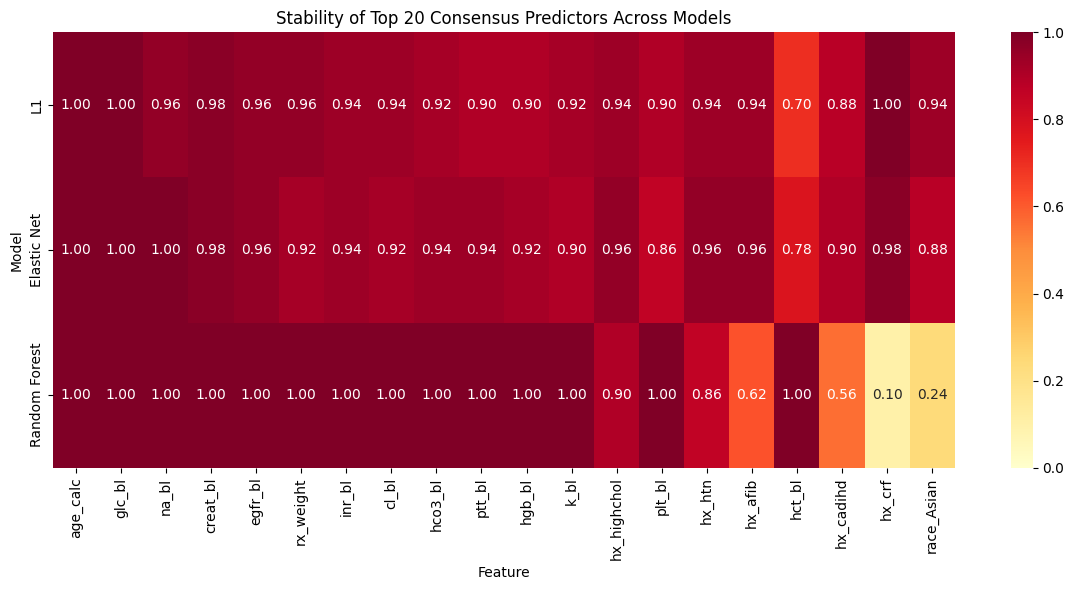

In [32]:
# Visualizations 

top_n_features = 20

top_features = consensus_features.head(top_n_features)

data = top_features[['L1_freq', 'Elastic_Net_freq', 'Random_forest_freq']].T

plt.figure(figsize = (12, 6))
sns.heatmap(
    data,
    xticklabels= top_features['feature'].values, 
    yticklabels= ['L1', 'Elastic Net', 'Random Forest'],
    annot = True,
    fmt = '.2f',
    cmap = 'YlOrRd',
    vmin = 0,
    vmax=1
)



plt.title('Stability of Top 20 Consensus Predictors Across Models')
plt.xlabel("Feature")
plt.ylabel("Model")

plt.tight_layout(
)


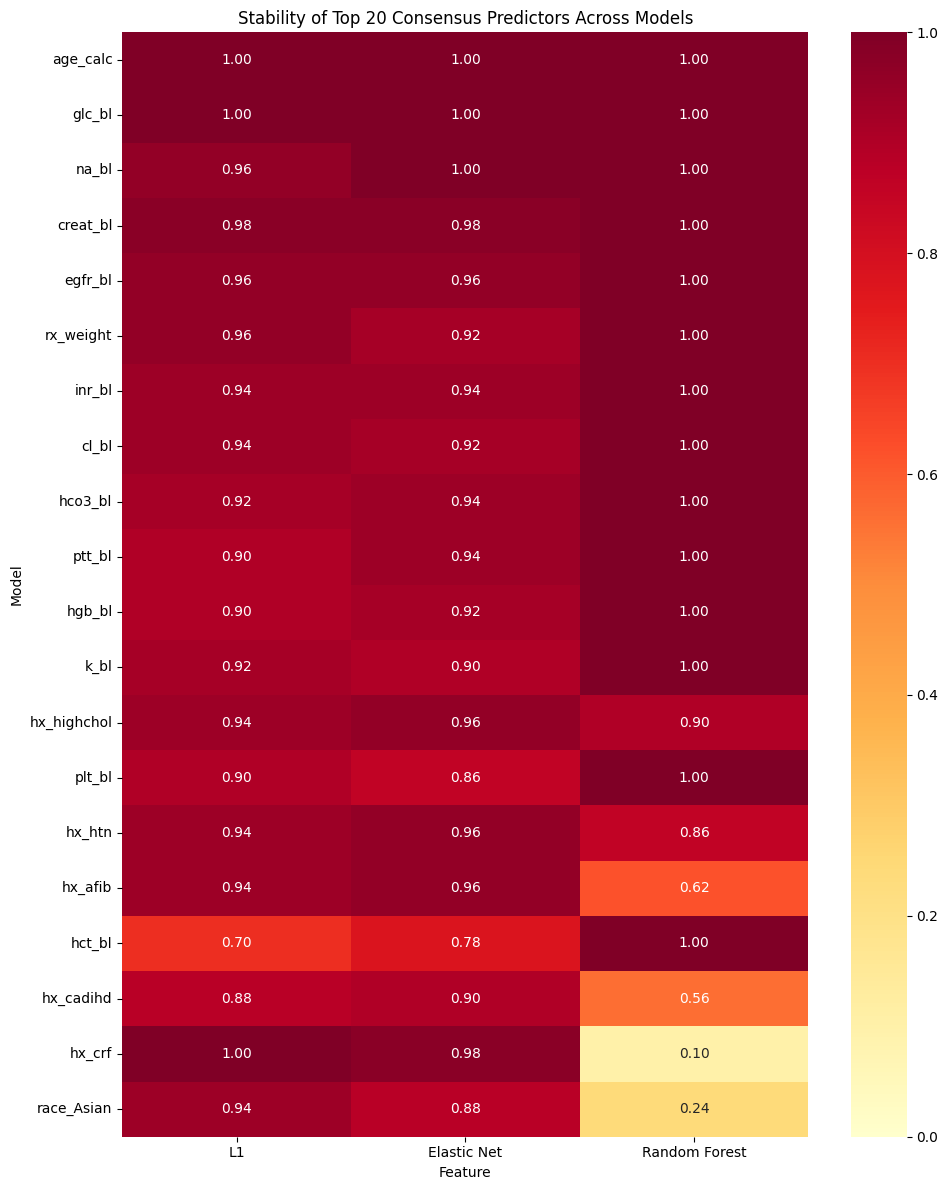

In [33]:

top_n_features = 20

top_features = consensus_features.head(top_n_features)

data = top_features[['L1_freq', 'Elastic_Net_freq', 'Random_forest_freq']].values



fig, ax = plt.subplots(figsize=(10, 12))

sns.heatmap(
    data,
    xticklabels= ['L1', 'Elastic Net', 'Random Forest'],
    yticklabels= top_features['feature'].values, 
    annot = True,
    cmap = 'YlOrRd',
    fmt = '.2f',
    vmax=1,
    vmin = 0,
    ax = ax
)



plt.title('Stability of Top 20 Consensus Predictors Across Models')
plt.xlabel("Feature")
plt.ylabel("Model")

plt.tight_layout(
)

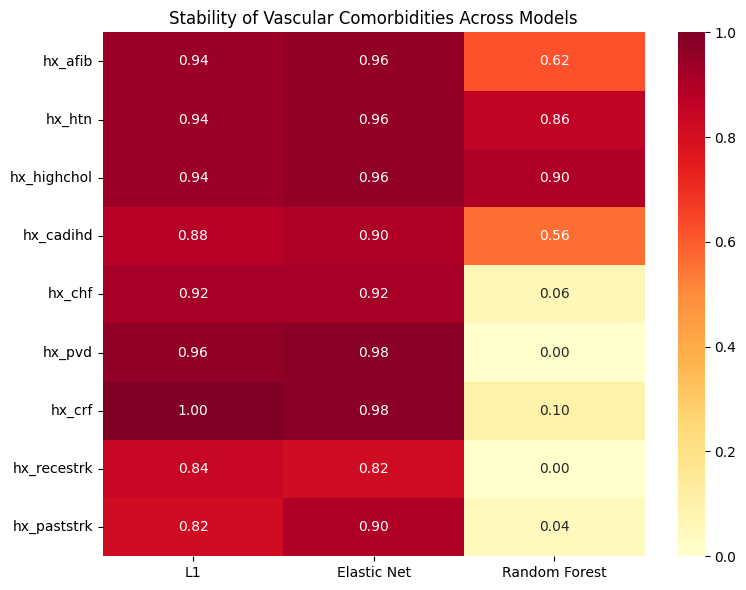

In [34]:

# Stability Heatmap for just the vascular features 

vascular_features = [
    "hx_afib",
    "hx_htn",
    "hx_highchol",
    "hx_cadihd",
    "hx_chf",
    "hx_pvd",
    "hx_crf",
    "hx_recestrk",
    "hx_paststrk",
]

vascular_stability = stability_compare[
    stability_compare["feature"].isin(vascular_features)].copy()


vascular_features_order = [
    "hx_afib",
    "hx_htn",
    "hx_highchol",
    "hx_cadihd",
    "hx_chf",
    "hx_pvd",
    "hx_crf",
    "hx_recestrk",
    "hx_paststrk",
]

vascular_stability["feature"] = pd.Categorical(vascular_stability["feature"], categories= vascular_features_order, 
ordered = True)


vascular_stability = vascular_stability.sort_values("feature")


fig, ax = plt.subplots(figsize=(8, 6))

heatmap_data = vascular_stability[["L1_freq", "Elastic_Net_freq", "Random_forest_freq"]].values

sns.heatmap(
    heatmap_data,
    yticklabels=vascular_stability["feature"].values,
    xticklabels=["L1", "Elastic Net", "Random Forest"],
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    vmax=1,
    vmin=0,
    ax=ax,
)

ax.set_title("Stability of Vascular Comorbidities Across Models")
plt.tight_layout()

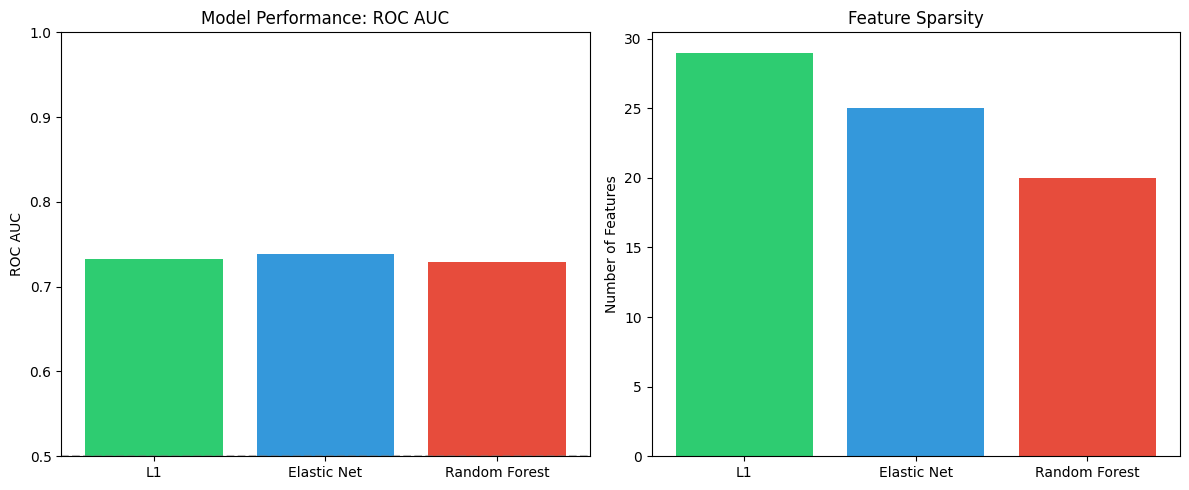

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Performance by ROC AUC comparision
axes[0].bar(['L1', 'Elastic Net', 'Random Forest'],

            [l1_auc, en_auc, rf_auc],

            color=['#2ecc71', '#3498db', '#e74c3c'])


axes[0].set_ylabel('ROC AUC')
axes[0].set_title('Model Performance: ROC AUC')

axes[0].set_ylim([0.5, 1.0])
axes[0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)



# Feature selection comparison 
axes[1].bar(['L1', 'Elastic Net', 'Random Forest'], [l1_n_selected, en_n_selected, rf_n_important], color=['#2ecc71', '#3498db', '#e74c3c'])

axes[1].set_ylabel('Number of Features')
axes[1].set_title('Feature Sparsity')



plt.tight_layout()





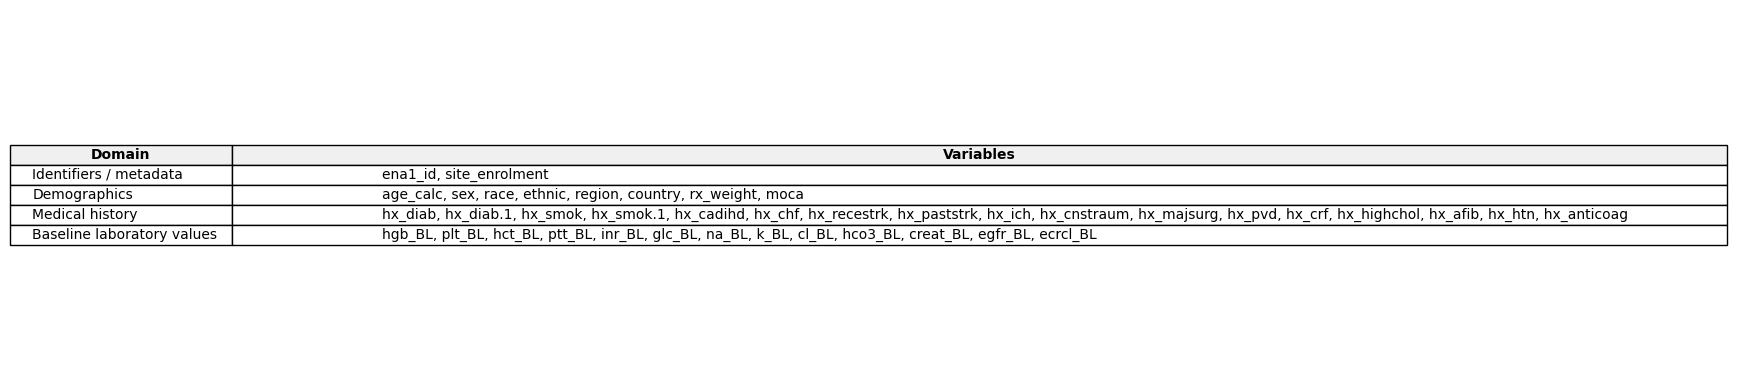

In [36]:
# Tbale of features before preprocessing 

domains_before_preprocess = {
    "Identifiers / metadata": [ "ena1_id", "site_enrolment",
    ],

    "Demographics": [ "age_calc","sex", "race", "ethnic", "region",
        "country",  "rx_weight", "moca",

    ],


    "Medical history": [ "hx_diab", "hx_diab.1", "hx_smok", "hx_smok.1", "hx_cadihd", "hx_chf",
        "hx_recestrk", "hx_paststrk", "hx_ich", "hx_cnstraum", "hx_majsurg",
        "hx_pvd", "hx_crf", "hx_highchol", "hx_afib", "hx_htn",
        "hx_anticoag",
    
    ],
    
    "Baseline laboratory values": [ "hgb_BL","plt_BL", "hct_BL", "ptt_BL","inr_BL", "glc_BL","na_BL",
        "k_BL", "cl_BL", "hco3_BL","creat_BL", "egfr_BL", "ecrcl_BL",
    ],
}

rows = []
for domain, vars_list in domains_before_preprocess.items():
    rows.append({
        "Domain": domain,
        "Variables": ", ".join(vars_list)
    })




df_before_domains = pd.DataFrame(rows)

fig, ax = plt.subplots(figsize=(14, 4)) 
ax.axis('off')

before_table = ax.table(
    cellText=df_before_domains.values,
    colLabels=df_before_domains.columns,
    cellLoc='left',
    loc='center'
)


before_table.auto_set_font_size(False)
before_table.set_fontsize(10)


before_table.auto_set_column_width(col = list(range(len( df_before_domains.columns ))))

for (row, col), cell in before_table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#f0f0f0')



plt.tight_layout()
plt.show()



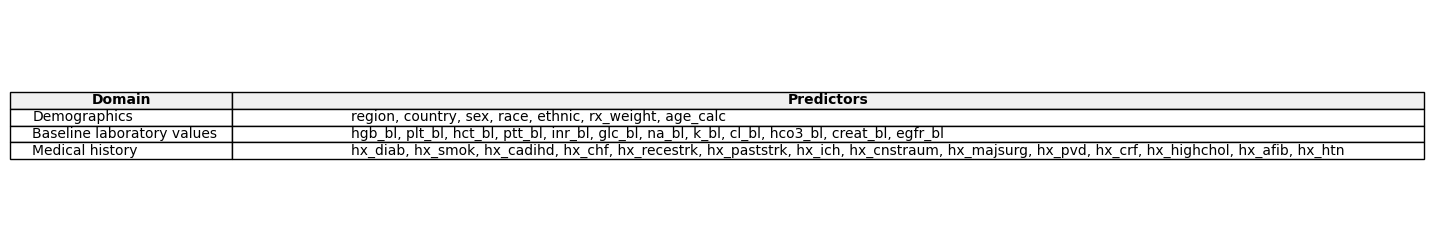

In [37]:
#Table of features after preprocessing (features dropped, duplicate columns removed, etc)

domains_after_preprocess = {
    "Demographics": [
        "region","country", "sex", "race", "ethnic",
        "rx_weight", "age_calc"
    ],

    "Baseline laboratory values": [
        "hgb_bl", "plt_bl", "hct_bl","ptt_bl", "inr_bl", "glc_bl", "na_bl", "k_bl", "cl_bl", "hco3_bl",
        "creat_bl", "egfr_bl"
    ],


    "Medical history": [
        "hx_diab", "hx_smok", "hx_cadihd","hx_chf", "hx_recestrk", "hx_paststrk", "hx_ich",
        "hx_cnstraum", "hx_majsurg", "hx_pvd", "hx_crf",
        "hx_highchol","hx_afib",  "hx_htn"
    ]
}


rows = []
for domains_after_preprocess, vars_list in domains_after_preprocess.items():
    rows.append({
        "Domain": domains_after_preprocess,
        "Predictors": ", ".join(vars_list)
    })


df_domains_after = pd.DataFrame(rows)

fig, ax = plt.subplots(figsize=(14, 3))
ax.axis('off')



after_table = ax.table(
    cellText= df_domains_after.values,
    colLabels= df_domains_after.columns,

    loc = 'center',
    cellLoc = 'left',
)



after_table.auto_set_font_size(False)
after_table.set_fontsize(10)
after_table.auto_set_column_width(col= list( range(len( df_domains_after.columns))))


for (row, col), cell in after_table.get_celld().items():

    if row == 0:
        cell.set_text_props(weight='bold')

        cell.set_facecolor('#f0f0f0')
